In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.io import readsav

from create_spec import create_spec
from fit2gauss import fit2gauss

import iris_lmsalpy.extract_irisL2data as extract_irisL2data
import iris_lmsalpy.fit_iris as fi

from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
path = '/Users/WilliamHenryAshfieldIV/dat/iris/'
filename = 'rast_data.sav'
fn = path+filename

In [3]:
ro = readsav(fn,verbose=False,python_dict=False)

In [4]:
data = ro.rast['data'][0]
wl = ro.rast['wl'][0]
err = ro.rast['err'][0]

In [5]:
time = 1507

In [6]:
dat = data[time,:]
err = err[time,:]

In [7]:
jj = np.where((wl > 1402) & (wl < 1404)) 
dat = dat[jj]
err = err[jj]
wl = wl[jj]

In [8]:
fit = fit2gauss(wl,dat,err,verbose=True,chi_thr=20.)

est params =  [251.1174878450525, 1403.3653919568144, 0.1, 2913.7355281959785, 1402.8711392995872, 0.1]
single peak found
only one peak still
new init params =  [251.1174878450525, 1403.3653919568144, 0.1, 2913.7355281959785, 1402.8711392995872, 0.1]
a2g = [3.85074683e+01 1.40317209e+03 1.73551846e-01 4.49620503e+03
 1.40290232e+03 9.20845438e-02]
a1g[0] = 4502.412215280522
chi2g =  38.16771497951608
a2g =  [3.85074683e+01 1.40317209e+03 1.73551846e-01 4.49620503e+03
 1.40290232e+03 9.20845438e-02]
chi1g =  43.826322453875925
chi2g =  38.16771497951608


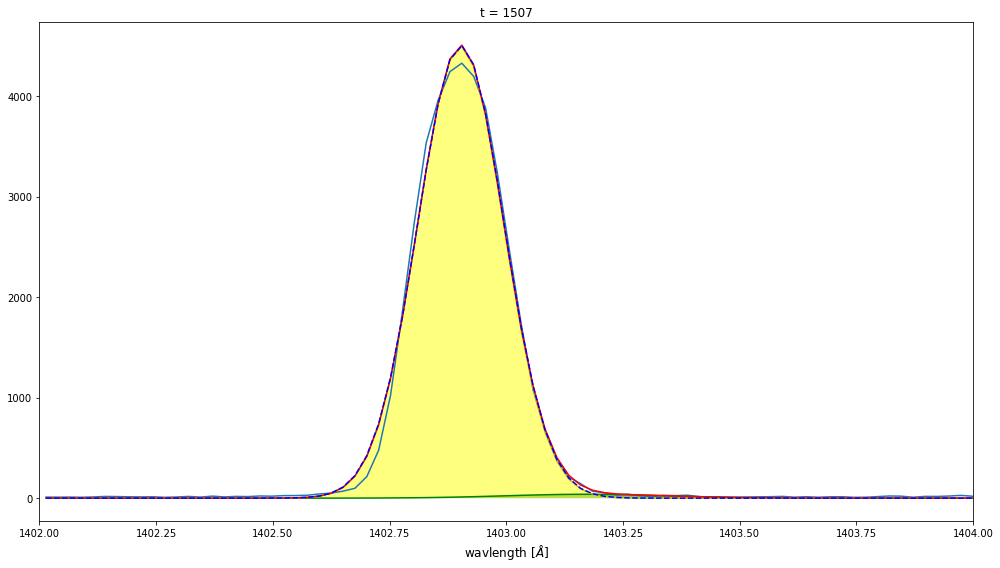

In [9]:
# extract arrays
y2a = fit["y2a"]
y2b = fit["y2b"]
y1g = fit["y1g"]

#plot 
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

# spectrum
ax1.plot(wl, dat)

# peak 1
ax1.plot(wl, y2a, "g")
ax1.fill_between(wl, y2a.min(), y2a, facecolor="green", alpha=0.5)
  
# peak 2
ax1.plot(wl, y2b, "y")
ax1.fill_between(wl, y2b.min(), y2b, facecolor="yellow", alpha=0.5) 

#both
ax1.plot(wl,y2a+y2b, "r")

# single fit
ax1.plot(wl,y1g,'b--')
    
ax1.set_xlim(1402.,1404.)
ax1.set_xlabel("wavlength [$\AA$]",  fontsize=12)
ax1.set_title('t = '+str(time))
fig.tight_layout()

In [10]:
a1g = fit["a1g"]
a2g = fit["a2g"]

line = 1402.77
l1 = a2g[1]
l2 = a2g[4]
v1 = (l1-line)/line*3e5
v2 = (l2-line)/line*3e5

print('blue velocity = ',v1,'-----', '"red" velocity = ', v2)

blue velocity =  85.99112106311269 ----- "red" velocity =  28.298220933863394
